## Basketball Court Survey - Data Analysis

#### Surveying procedure
- We surveyed the basketball court that is beside KMITL stadium since 22 April 2019 to 28 April 2019.(1 week)
- In each day, we divided data collection in every 30 minutes interval from 17:00 to 19:00
- In each interval, we collected total users, gender, age(approximate by eye) and activities whether they played basketball or not.

#### Note
- In 26 APR 2019, trash burning near the basketball court, we considered that this could affect data.

## Import Data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

data = pd.read_csv("survey-basketball-court-usage.csv")

data.head()

,Date,Time Interval,Total User,Playing,Not Playing,Male,Female,Children,Teenager,Adult,Elder
0,22-Apr-19,17:00-17:30,4,4,0,2,2,0,4,0,0
1,22-Apr-19,17:30-18:00,4,3,1,4,0,0,4,0,0
2,22-Apr-19,18:00-18:30,9,9,0,9,0,1,8,0,0
3,22-Apr-19,18:30-19:00,19,13,6,17,2,0,15,2,2
4,23-Apr-19,17:00-17:30,1,1,0,1,0,0,1,0,0


In [2]:
data.describe()

,Total User,Playing,Not Playing,Male,Female,Children,Teenager,Adult,Elder
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,11.214286,8.642857,2.571429,10.035714,1.178571,0.607143,9.250000,1.285714,0.071429
std,8.900092,6.572751,3.259500,8.346577,1.564740,1.030616,7.744173,2.174893,0.377964
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,0.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,9.500000,8.000000,2.000000,9.000000,0.500000,0.000000,7.000000,1.000000,0.000000
75%,15.750000,13.000000,3.000000,13.250000,2.000000,1.000000,14.250000,1.250000,0.000000
max,32.000000,27.000000,12.000000,30.000000,5.000000,4.000000,32.000000,10.000000,2.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
Date             28 non-null object
Time Interval    28 non-null object
Total User       28 non-null int64
Playing          28 non-null int64
Not Playing      28 non-null int64
Male             28 non-null int64
Female           28 non-null int64
Children         28 non-null int64
Teenager         28 non-null int64
Adult            28 non-null int64
Elder            28 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.5+ KB


## Data Exploration

Total user distribution(in each time interval)

Average User : 11.214285714285714
Median : 9.5
User range : 32.0 ( 0.5 - 32.5 )


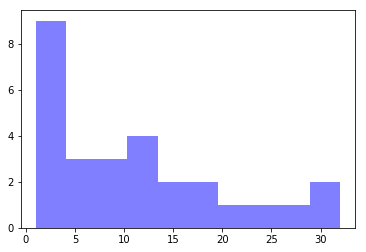

In [4]:
totalUser = data['Total User']
avgTotalUser = totalUser.mean()
sdTotalUser = totalUser.std(ddof=1)
medTotalUser = totalUser.median()
minTotalUser, maxTotalUser = totalUser.min() - 0.5, totalUser.max() + 0.5

print('Average User :', avgTotalUser)
print('Median :', medTotalUser)
print('User range :', maxTotalUser - minTotalUser, '(', minTotalUser, '-', maxTotalUser, ')')

n, bins, patches = plt.hist(totalUser, 10, facecolor='blue', alpha=0.5)

People that uses basketball court, compare by ages

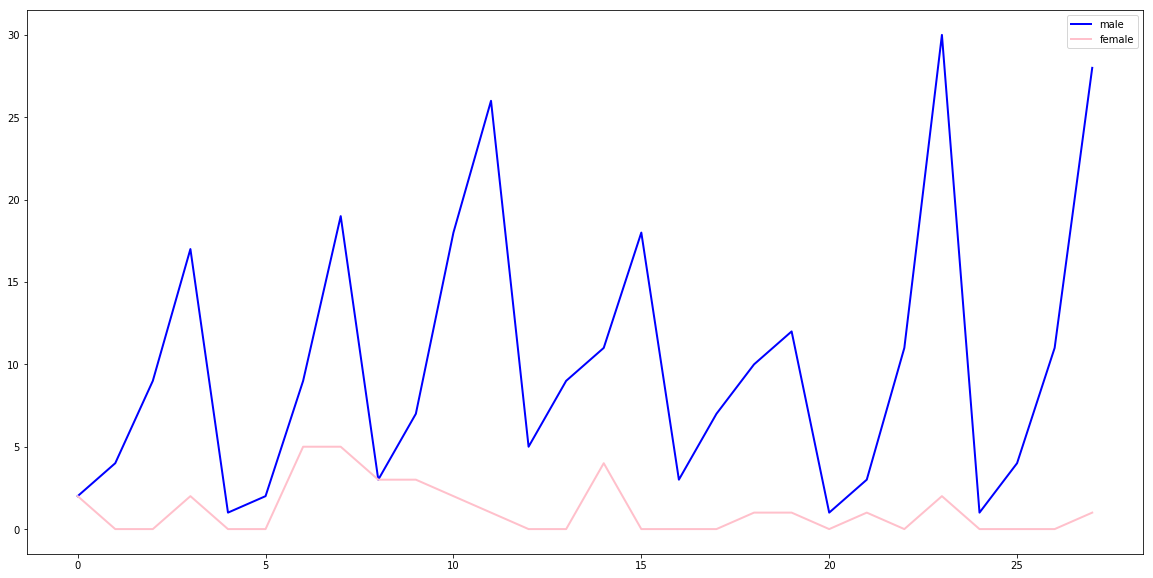

In [5]:
genderData = pd.DataFrame({'x':range(0,28),'male':data['Male'], 'female': data['Female']})

plt.figure(figsize=(20,10))
plt.plot('x', 'male', data=genderData, color='blue', linewidth=2)
plt.plot('x', 'female', data=genderData, color='pink', linewidth=2)
plt.legend()

People that uses basketball court, compare by gender

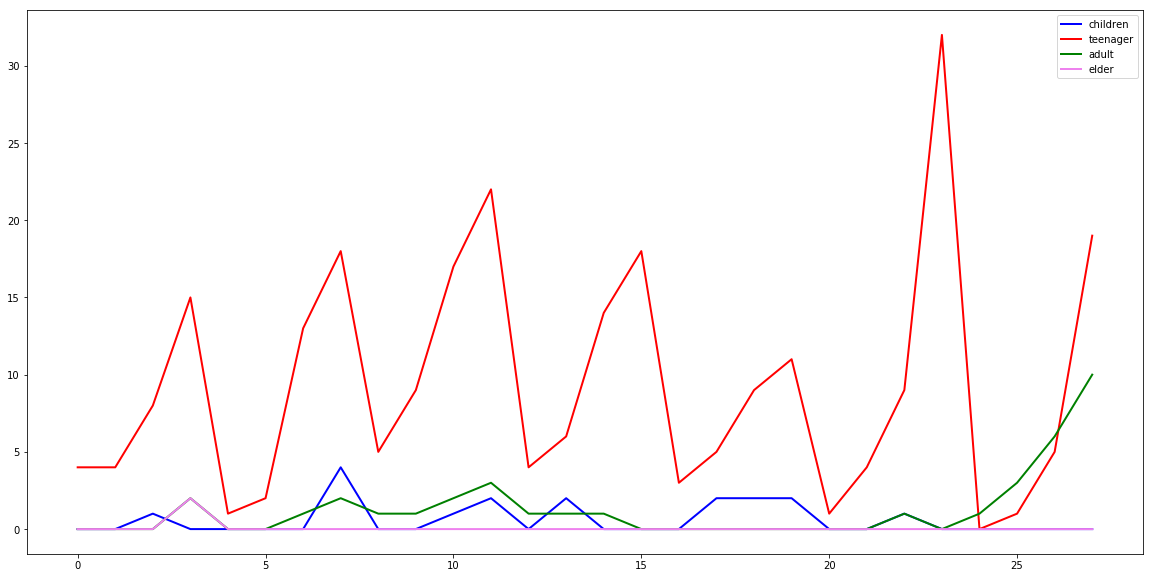

In [6]:
ageData = pd.DataFrame({'x':range(0,28), 'children':data['Children'], 'teenager':data['Teenager'], 'adult':data['Adult'], 'elder':data['Elder']})

plt.figure(figsize=(20,10))
plt.plot('x', 'children', data=ageData, color='blue', lineWidth=2)
plt.plot('x', 'teenager', data=ageData, color='red', lineWidth=2)
plt.plot('x', 'adult', data=ageData, color='green', lineWidth=2)
plt.plot('x', 'elder', data=ageData, color='violet', lineWidth=2)
plt.legend()

### Relationship between total users and users who played basketball

In [7]:
def linear_regression(df):
    n = np.size(df)
    x_mean, y_mean = np.mean(df['x']), np.mean(df['y'])


    # Calculate the terms needed for the numerator and denominator of beta
    df['xycov'] = (df['x'] - x_mean) * (df['y'] - y_mean)
    df['xvar'] = (df['x'] - x_mean) ** 2

    # Calculate beta/alpha
    beta = df['xycov'].sum() / df['xvar'].sum()
    alpha = y_mean - (beta * x_mean)
    print('Ypredict = ',alpha,' + (', beta,'X)')

    # Cross-deviation and r^2
    SS_xy = np.sum(df['x']*df['y'] - n*y_mean*x_mean)
    SS_xx = np.sum(df['x']*df['x'] - n*x_mean*x_mean)
    SS_yy = np.sum(df['y']*df['y'] - n*y_mean*y_mean)
    R2 = (SS_xy * SS_xy) / (SS_xx * SS_yy)
    print('R-square : ', R2)
    # Prediction
    df['ypred'] = alpha + (beta * data['Total User'])
    plt.figure(figsize=(12, 6))
    plt.plot(df['x'], df['ypred'])
    plt.plot(df['x'], df['y'], 'bo')
    plt.xlabel('Total User')
    plt.ylabel('Playing')
    plt.show()

Ypredict =  0.7297107741633813  + ( 0.7056308863803354 X)
R-square :  1.0009720501210506


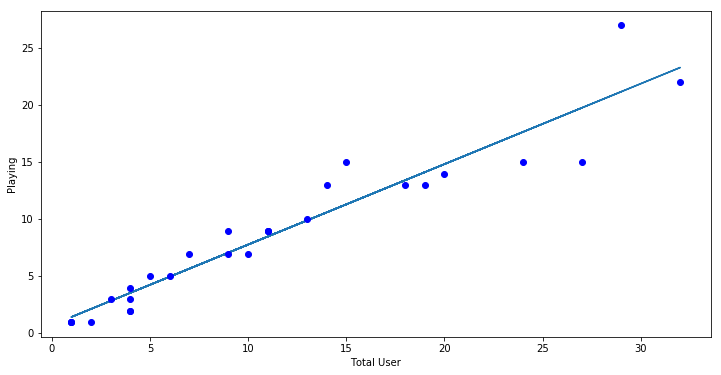

In [8]:
df = pd.DataFrame({"x": data['Total User'], "y": data['Playing']})
linear_regression(df)

### Relationship between total users and users who did not played basketball

Ypredict =  -0.7297107741633826  + ( 0.2943691136196647 X)
R-square :  1.0111850593455949


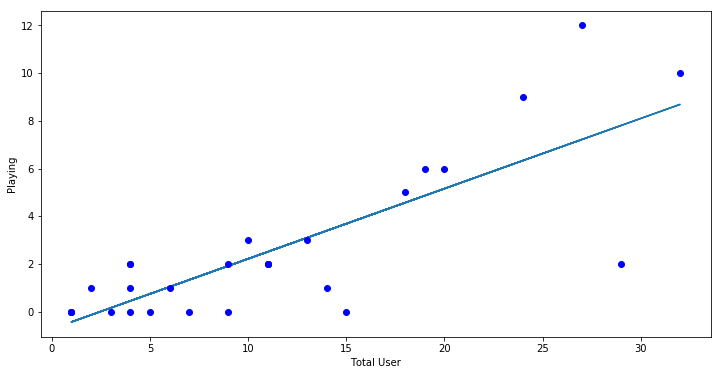

In [9]:
df = pd.DataFrame({"x": data['Total User'], "y": data['Not Playing']})
linear_regression(df)